In [21]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
 df=pd.read_csv("/content/co2_emissions_india_states.csv")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          150 non-null    object 
 1   Year                           150 non-null    int64  
 2   Population                     150 non-null    int64  
 3   Urbanization_Ratio             150 non-null    float64
 4   Vehicles_per_1000              150 non-null    float64
 5   Energy_Consumption_per_Capita  150 non-null    float64
 6   CO2_Emissions_per_Capita       150 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [24]:
df.describe()

Year    Population  Urbanization_Ratio  Vehicles_per_1000  \
count   150.000000  1.500000e+02          150.000000         150.000000   
mean   2013.666667  4.981672e+08            0.591425         448.017163   
std       5.283464  2.816460e+08            0.176428         222.988974   
min    2005.000000  5.627390e+06            0.306597          54.789404   
25%    2009.000000  2.370455e+08            0.439711         244.824675   
50%    2014.000000  5.007811e+08            0.595475         479.681814   
75%    2018.000000  7.425927e+08            0.736025         655.124649   
max    2023.000000  9.968774e+08            0.892601         798.450583   

       Energy_Consumption_per_Capita  CO2_Emissions_per_Capita  
count                     150.000000                150.000000  
mean                     2481.639660                 25.698280  
std                      1484.700484                  8.074069  
min                       147.877152                  5.484808  
25%                      1097.981633                 19.691213  
50%                      2476.905578                 25.131189  
75%                      3804.940739                 31.930382  
max                      4985.910051                 43.284275

In [25]:
df.isnull().sum()

State                            0
Year                             0
Population                       0
Urbanization_Ratio               0
Vehicles_per_1000                0
Energy_Consumption_per_Capita    0
CO2_Emissions_per_Capita         0
dtype: int64

[]

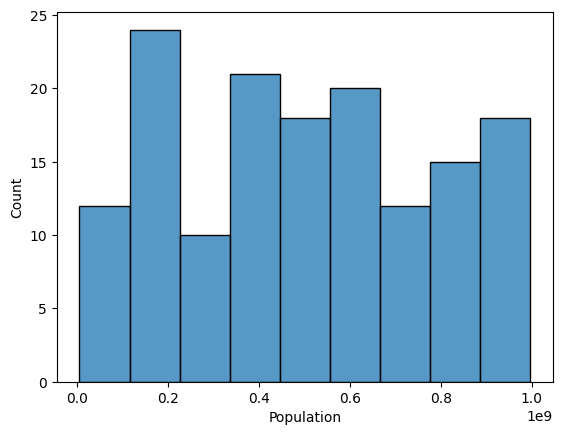

In [26]:
sns.histplot(df["Population"])
plt.plot()

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['State'] = label_encoder.fit_transform(df['State'])

In [28]:
df.head()

State  Year  Population  Urbanization_Ratio  Vehicles_per_1000  \
0      5  2015   140632604            0.729583         696.531988   
1      6  2017   795472044            0.695354         683.412049   
2     12  2015   202425692            0.316258         289.325355   
3     19  2020   164492286            0.433183         671.686606   
4      4  2019   165101532            0.438645          77.755726   

   Energy_Consumption_per_Capita  CO2_Emissions_per_Capita  
0                    3921.242436                 30.663023  
1                     624.205130                 22.704236  
2                    3829.036722                 25.682983  
3                    2752.206236                 25.953918  
4                    4818.660819                 29.952217

In [29]:
df.drop(columns=["Year"],inplace=True)

In [30]:
df.head()

State  Population  Urbanization_Ratio  Vehicles_per_1000  \
0      5   140632604            0.729583         696.531988   
1      6   795472044            0.695354         683.412049   
2     12   202425692            0.316258         289.325355   
3     19   164492286            0.433183         671.686606   
4      4   165101532            0.438645          77.755726   

   Energy_Consumption_per_Capita  CO2_Emissions_per_Capita  
0                    3921.242436                 30.663023  
1                     624.205130                 22.704236  
2                    3829.036722                 25.682983  
3                    2752.206236                 25.953918  
4                    4818.660819                 29.952217

In [31]:
x = df.drop(columns=["CO2_Emissions_per_Capita"])
y = df["CO2_Emissions_per_Capita"]

In [32]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [34]:
ypred = model.predict(xtest)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 0.8778509160444795
Mean Squared Error: 1.267669884454521
R-squared Score: 0.9806597267333399
